In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import calendar

%matplotlib inline

In [5]:
#importing dataframe
df = pd.read_csv("Uber-Drives.csv")

In [7]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [8]:
miles_col = df['MILES*']
tot_miles = miles_col[-1:]
df=df[:-1]

In [9]:
df['START_DATE*'] = pd.to_datetime(df['START_DATE*'])
df['END_DATE*'] = pd.to_datetime(df['END_DATE*'])

In [13]:
df.isnull().any()

#the above commmand helped me see that only PURPOSE* column has NaN values so I'll drop it

df_n = df.drop('PURPOSE*',axis=1)

In [14]:
df_n.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7


In [15]:
df_n.dtypes

START_DATE*    datetime64[ns]
END_DATE*      datetime64[ns]
CATEGORY*              object
START*                 object
STOP*                  object
MILES*                float64
dtype: object

In [16]:
#calculating the duration of each trip using start date and end date columns

s_d_i_s = [(t-datetime.datetime(1970,1,1)).total_seconds() for t in df['START_DATE*']]
e_d_i_s = [(t-datetime.datetime(1970,1,1)).total_seconds() for t in df['END_DATE*']]

trip_time_in_mins = [(e_d_i_s[i]- s_d_i_s[i])/60 for i in range(len(s_d_i_s))]

In [19]:
df_n['Travel_time_for_each_trip_in_minutes'] = trip_time_in_mins
tot_travel_time = sum(df_n['Travel_time_for_each_trip_in_minutes'])

avg_travel_time_of_each_passenger = tot_travel_time/len(df_n['Travel_time_for_each_trip_in_minutes'])
print(avg_travel_time_of_each_passenger)
df_n.head()

23.243290043290042


,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,Travel_time_for_each_trip_in_minutes
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,67.0


Text(0, 0.5, 'No. of Trips')

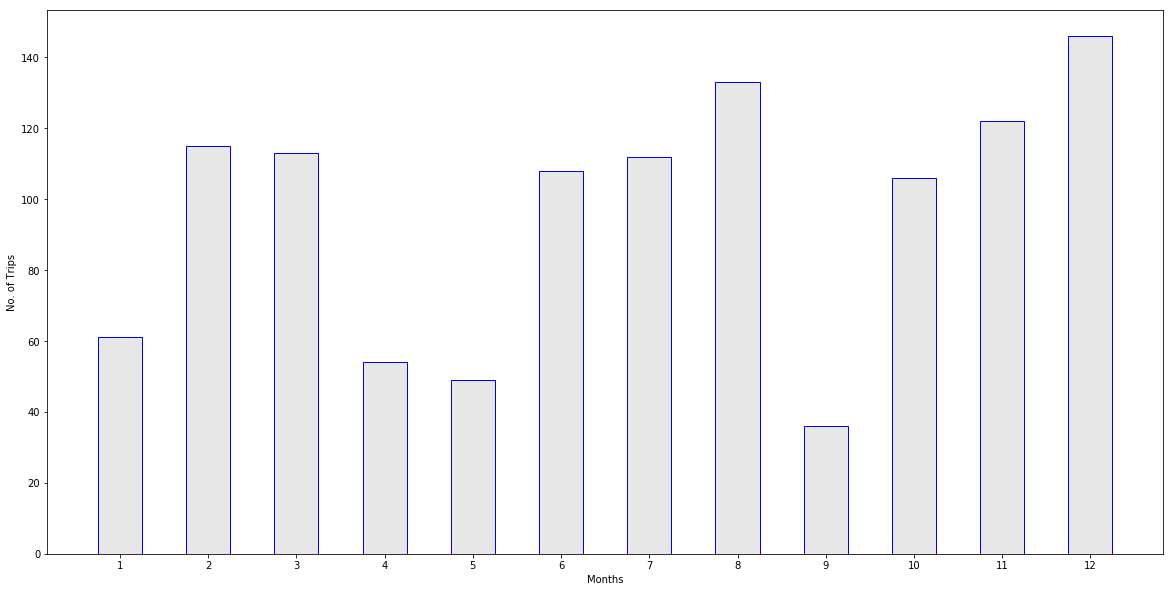

In [25]:
#We will now extract the months and the number of trips on a particular month and plot the data


list_month = [df['START_DATE*'][i].month for i in range(len(df['START_DATE*']))]

#a dictionary named d_month for storing the total rides in every month
d_month = {}

for i in range(len(list_month)):
    if list_month[i] in d_month:
       d_month[list_month[i]]+=1
    else:
       d_month[list_month[i]]=1

# plotting it's graph

all_keys = d_month.keys()
all_values = d_month.values()

fig = plt.figure(figsize=(20,10))
plt.xticks(np.arange(0, 13, 1))
plt.bar(all_keys, all_values,width=0.5,color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue')

plt.xlabel('Months')
plt.ylabel('No. of Trips')

In [28]:
#months with highest trips

max_trips = (max(d_month.values()))
for month, trips in d_month.items(): 
    if trips == max_trips:
        print("The month which has maximum trips is: ",calendar.month_name[month]," with number of trips as: ",max_trips)
        break

The month which has maximum trips is:  December  with number of trips as:  146


Text(0, 0.5, 'Number of Trips')

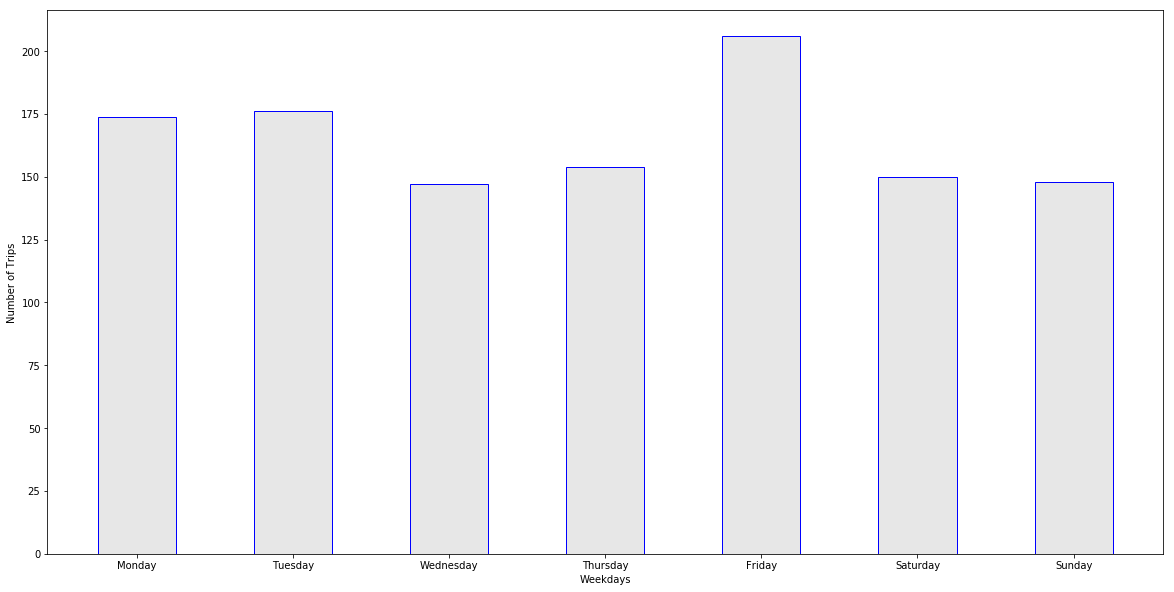

In [30]:
# Now lets visulaize data per day of the week that is number of trips done per day in a week


l_days = [calendar.day_name[i.weekday()] for i in df['START_DATE*']]

#creating a dictionary of days

d_days = {'Monday': 0,'Tuesday': 0, 'Wednesday': 0,'Thursday': 0, 'Friday': 0, 'Saturday': 0, 'Sunday': 0}

for i in range(len(l_days)):
    if l_days[i] in d_days:
       d_days[list_days[i]]+=1
    else:
       d_days[list_days[i]]=1

all_keys_days = d_days.keys()
all_values_days = d_days.values()

fig = plt.figure(figsize=(20,10))
plt.bar(all_keys_days, all_values_days,width=0.5,color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue')

plt.xlabel('Weekdays')
plt.ylabel('Number of Trips')

Text(0, 0.5, 'Number of Trips')

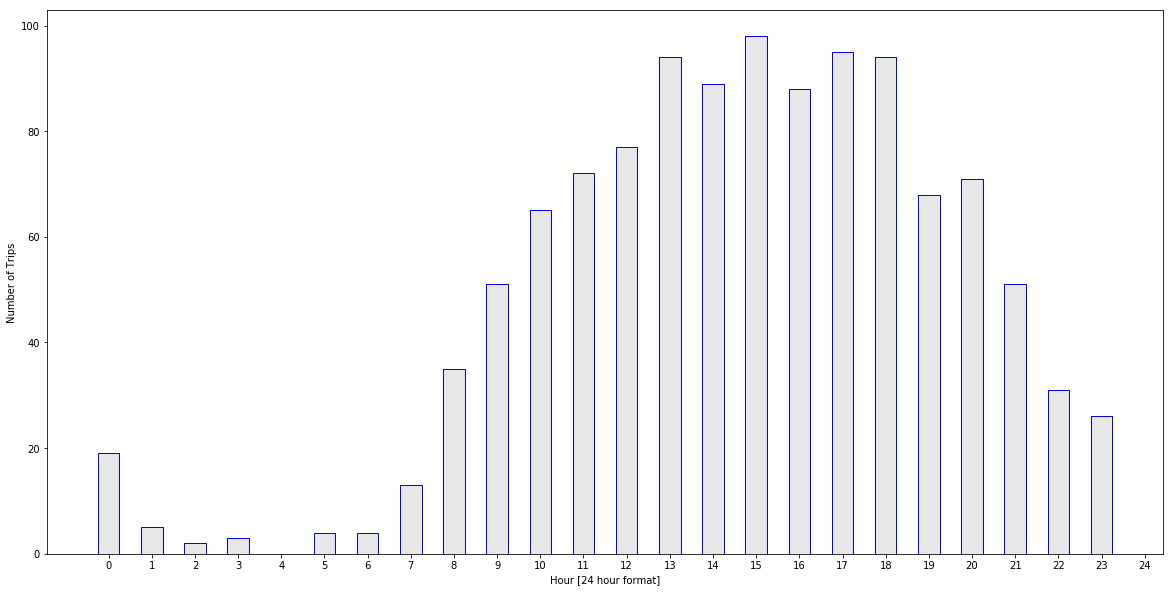

In [31]:
# peak hour in a day in which most trips are acquired



l_hour = [df['START_DATE*'][i].hour for i in range(len(df['START_DATE*']))]

#I created a dictionary named dict_hour for storing the total rides for each hour
d_hour = {}

for i in range(len(l_hour)):
    if l_hour[i] in d_hour:
       d_hour[l_hour[i]]+=1
    else:
       d_hour[l_hour[i]]=1
    
# plotting it in a graph to see the hourly rides


all_keys_hour = d_hour.keys()
all_values_hour = d_hour.values()

fig = plt.figure(figsize=(20,10))
plt.xticks(np.arange(0, 25, 1))
plt.bar(all_keys_hour, all_values_hour,width=0.5,color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue')

plt.xlabel('Hour [24 hour format]')
plt.ylabel('Number of Trips')

In [32]:
travel_speed_each_trip = []
for i in range(len(df_n['MILES*'])):
    if(df_n['Travel_time_for_each_trip_in_minutes'][i]!=0):
        travel_speed_each_trip.append(df_new['MILES*'][i]/df_n['Travel_time_for_each_trip_in_minutes'][i])
    else:
        travel_speed_each_trip.append(0)
avg_travel_speed = sum(travel_speed_each_trip)/len(df_new['MILES*'])
print(avg_travel_speed)

0.445247628004758
